In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [188]:
d1 = pd.read_csv('train.csv')
dt1 = pd.read_csv('test.csv')

In [216]:
target = d1['SalePrice']

In [151]:
d1.loc[:,d1.isna().sum()>0].isna().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [189]:
df1 = pd.concat([d1, dt1], axis = 0)

In [191]:
df1 = df1.drop(['SalePrice'], axis = 1)

In [192]:
df1.loc[:,df1.isna().sum()>1000].isna().sum()

Alley          2721
FireplaceQu    1420
PoolQC         2909
Fence          2348
MiscFeature    2814
dtype: int64

In [194]:
df1['MSSubClass'] = df1['MSSubClass'].astype('object')
df1['YearBuilt']=df1['YearBuilt'].astype('object')
df1['YearRemodAdd']=df1['YearRemodAdd'].astype('object')
df1['MoSold']=df1['MoSold'].astype('object')
df1['YrSold']=df1['YrSold'].astype('object')
df1['MasVnrArea']=df1['MasVnrArea'].astype('float64')
df1['GarageYrBlt']=df1['GarageYrBlt'].astype('object')

In [195]:
df1.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     2919 non-null   object
 1   MSZoning       2915 non-null   object
 2   Street         2919 non-null   object
 3   Alley          198 non-null    object
 4   LotShape       2919 non-null   object
 5   LandContour    2919 non-null   object
 6   Utilities      2917 non-null   object
 7   LotConfig      2919 non-null   object
 8   LandSlope      2919 non-null   object
 9   Neighborhood   2919 non-null   object
 10  Condition1     2919 non-null   object
 11  Condition2     2919 non-null   object
 12  BldgType       2919 non-null   object
 13  HouseStyle     2919 non-null   object
 14  YearBuilt      2919 non-null   object
 15  YearRemodAdd   2919 non-null   object
 16  RoofStyle      2919 non-null   object
 17  RoofMatl       2919 non-null   object
 18  Exterior1st    2918 non-null

In [196]:
df1.select_dtypes(np.number).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   LotFrontage    2433 non-null   float64
 2   LotArea        2919 non-null   int64  
 3   OverallQual    2919 non-null   int64  
 4   OverallCond    2919 non-null   int64  
 5   MasVnrArea     2896 non-null   float64
 6   BsmtFinSF1     2918 non-null   float64
 7   BsmtFinSF2     2918 non-null   float64
 8   BsmtUnfSF      2918 non-null   float64
 9   TotalBsmtSF    2918 non-null   float64
 10  1stFlrSF       2919 non-null   int64  
 11  2ndFlrSF       2919 non-null   int64  
 12  LowQualFinSF   2919 non-null   int64  
 13  GrLivArea      2919 non-null   int64  
 14  BsmtFullBath   2917 non-null   float64
 15  BsmtHalfBath   2917 non-null   float64
 16  FullBath       2919 non-null   int64  
 17  HalfBath       2919 non-null   int64  
 18  BedroomA

In [227]:
num_cols = df1.select_dtypes(np.number).columns.tolist()

In [197]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   object 
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [199]:
df1.loc[:,df1.isna().sum()>0].isna().sum()

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

In [200]:
#knn imputing to fill the missing values for numericals
from sklearn.neighbors import KNeighborsRegressor

def knn_imputing(df, na_column):
  df = df.copy()
  num_df= df.select_dtypes(np.number)
  non_na_columns = num_df.loc[:, num_df.isna().sum() == 0].columns

  y_train = num_df.loc[num_df[na_column].isna() == False, na_column]
  X_train = num_df.loc[num_df[na_column].isna() == False, non_na_columns]
  X_test = num_df.loc[num_df[na_column].isna() == True, non_na_columns]

  knn = KNeighborsRegressor()
  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)

  df.loc[df[na_column].isna() == True, na_column] = y_pred

  return df

In [201]:
df1.loc[:,df1.isna().sum()>0].select_dtypes(np.number).columns.tolist()

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars',
 'GarageArea']

In [202]:
for i in ['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars',
 'GarageArea']:
    df1 = knn_imputing(df1, i)

In [204]:
df1.loc[:,df1.isna().sum()>0].select_dtypes('object').isna().sum()

MSZoning           4
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Electrical         1
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

In [178]:
# test the ordinals functions using model failed ------
# model imputing to fill the missing values for ordinals
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pandas as pd
def model_imputing_ordinals(df, na_column):
  df = df.copy()
  object_df= df.select_dtypes('object')
  non_na_columns = object_df.loc[:, object_df.isna().sum() == 0].columns

  y_train = object_df.loc[object_df[na_column].isna() == False, na_column]
  X_train = object_df.loc[object_df[na_column].isna() == False, non_na_columns]
  X_test = object_df.loc[object_df[na_column].isna() == True, non_na_columns]
  names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
  ]
  classifier = [
    KNeighborsClassifier(4),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
  ]
  #model_dict = dict(zip(names,classifier))
  l_score = []
  l_clf = []
  l_clf_name = []
  for name, clf in zip(names, classifier):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    l_score.append(score)
    l_clf.append(clf)
    l_clf_name.append(name)
  score_table = pd.DataFrame({'classifier': l_clf_name,
                              'scores' : l_score,
                              'classifier_func':l_clf
                             }
                             , columns = ['classifier', 'scores', 'classifier_func'])
  model = score_table.loc[score_table['scores'] == score_table['scores'].max(), 'classifier_func']
  
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  df.loc[df[na_column].isna() == True, na_column] = y_pred
  #print(model, score_table['scores'].max())
  return df

In [205]:
df1.loc[:, df1.isna().sum()>0].select_dtypes('object').isna().sum()

MSZoning           4
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Electrical         1
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

In [207]:
df1['Alley'] = df1['Alley'].fillna('NoAlley')
df1['FireplaceQu'] = df1['FireplaceQu'].fillna('NoFireplace')
df1['PoolQC'] = df1['PoolQC'].fillna('NoPool')
df1['Fence'] = df1['Fence'].fillna('NoFence')
df1['MiscFeature'] = df1['MiscFeature'].fillna('NoMiscFeature')
df1['GarageCond'] = df1['GarageCond'].fillna('NoGarage')
df1['GarageQual'] = df1['GarageQual'].fillna('NoGarage')
df1['GarageType'] = df1['GarageType'].fillna('NoGarage')
df1['GarageFinish'] = df1['GarageFinish'].fillna('NoGarage')
df1['GarageYrBlt'] = df1['GarageYrBlt'].fillna('NoGarage')
df1['BsmtFinSF2'] = df1['BsmtFinSF2'].fillna('NoBasement')
df1['BsmtFinSF1'] = df1['BsmtFinSF1'].fillna('NoBasement')
df1['BsmtFinType1'] = df1['BsmtFinType1'].fillna('NoBasement')
df1['BsmtFinType2'] = df1['BsmtFinType2'].fillna('NoBasement')
df1['BsmtExposure'] = df1['BsmtExposure'].fillna('NoBasement')
df1['BsmtQual'] = df1['BsmtQual'].fillna('NoBasement')
df1['BsmtCond'] = df1['BsmtCond'].fillna('NoBasement')
df1['MasVnrType'] = df1['MasVnrType'].fillna('NoMasVnr')
df1['MasVnrArea'] = df1['MasVnrArea'].fillna(0)


In [208]:
df1.loc[:, df1.isna().sum()>0].select_dtypes('object').isna().sum()

MSZoning       4
Utilities      2
Exterior1st    1
Exterior2nd    1
Electrical     1
KitchenQual    1
Functional     2
SaleType       1
dtype: int64

In [213]:
for i in df1.loc[:, df1.isna().sum()>0].select_dtypes('object').columns.tolist():
    df1[i] = df1[i].fillna(df1[i].mode()[0])
    print(df1[i].mode()[0])

RL
AllPub
VinylSd
VinylSd
SBrkr
TA
Typ
WD


In [214]:
df1.loc[:, df1.isna().sum()>0].select_dtypes('object').columns.tolist()

[]

In [215]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   object 
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [219]:
target.shape

(1460,)

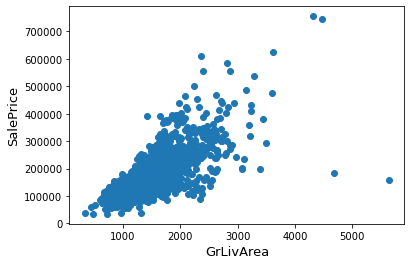

In [222]:
fig, ax = plt.subplots()
ax.scatter(x = d1['GrLivArea'], y = d1['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [228]:
num_cols

['Id',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

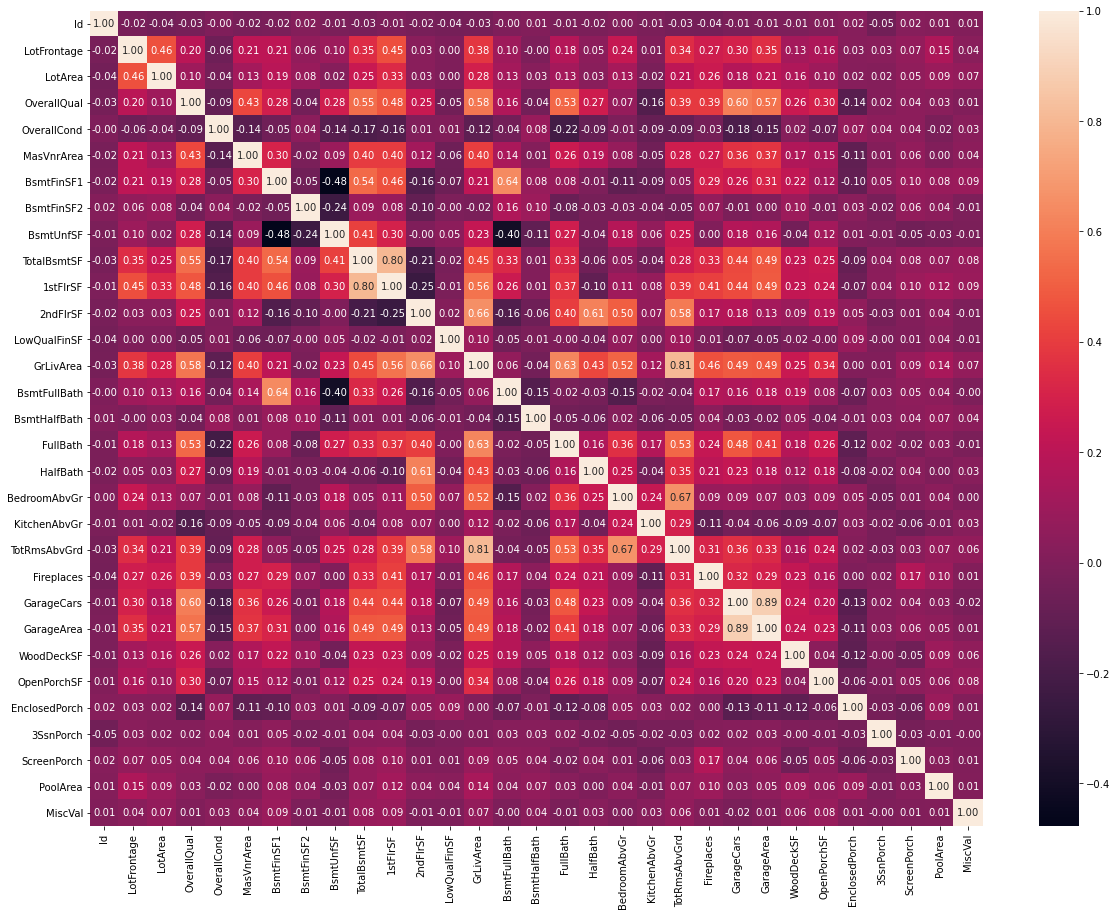

In [236]:
plt.figure(figsize = (20,15))
matrix=np.triu((df1[num_cols]).corr())
sns.heatmap((df1[num_cols]).corr(),annot=True,fmt='.2f') 
plt.show()

In [247]:
df2 = df1.copy()

In [248]:
df2['overall_rating'] = (df2['OverallQual'] + df2['OverallCond']) * 0.5
df2['Bsmt_bath'] = df2['BsmtFullBath'] + df2['BsmtHalfBath']
df2['Bath'] = df2['FullBath'] + df2['HalfBath']

In [249]:
df2 = df2.drop(['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','HalfBath','FullBath'], axis = 1)

In [251]:
df2['YrSold'] = df2['YrSold'].astype(int)
df2['YearBuilt'] = df2['YearBuilt'].astype(int)
df2['YearRemodAdd'] = df2['YearRemodAdd'].astype(int)

In [252]:
df2['House_age'] = df2.YrSold - df2.YearBuilt
df2['RemodAge'] = df2.YrSold - df2.YearRemodAdd

In [254]:
df2 = df2.drop(['YrSold','YearBuilt','YearRemodAdd'], axis = 1)

In [255]:
df2 = df2.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley'], axis = 1)

In [256]:
df2.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SaleType',
  

In [240]:
df2.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

<AxesSubplot:>

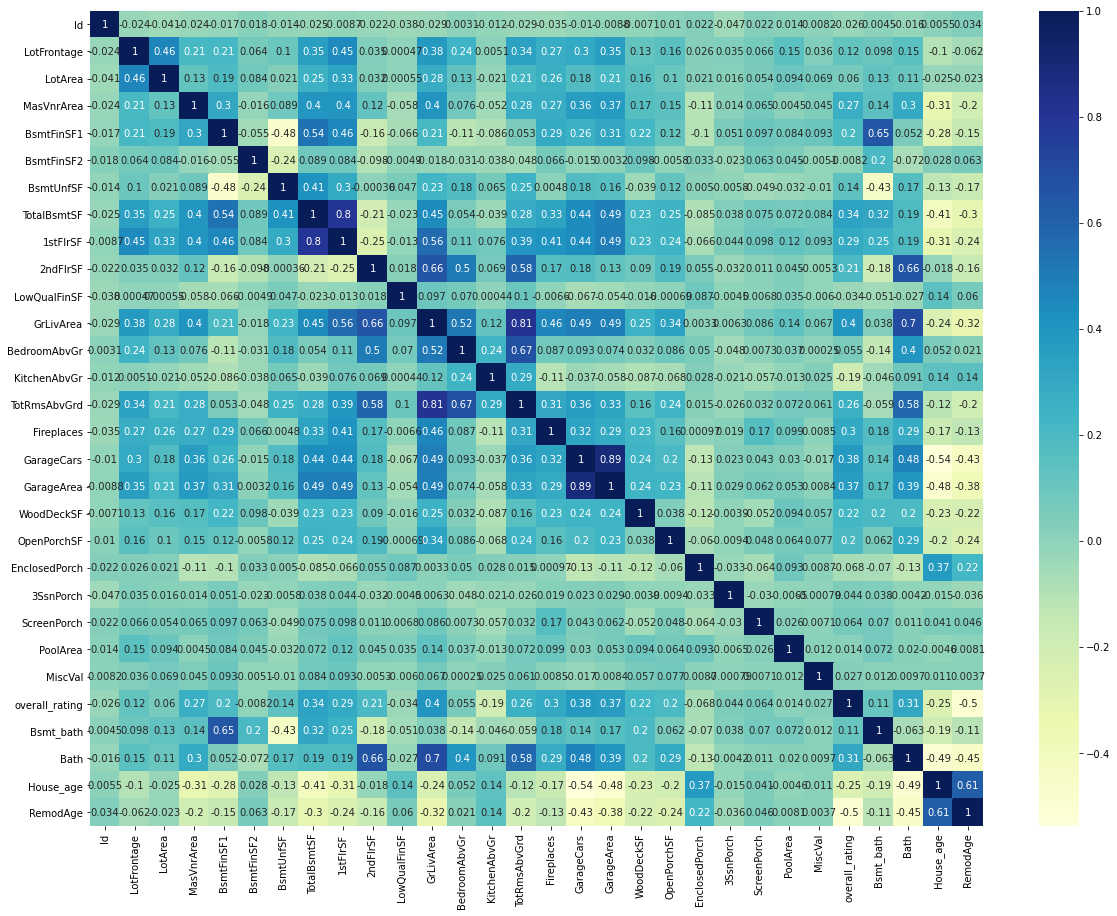

In [257]:
plt.figure(figsize = (20,15))
sns.heatmap(df2.corr(), cmap="YlGnBu", annot=True)

In [261]:
df2.drop(df2[['GarageYrBlt', 'TotRmsAbvGrd', 'GarageCars', '1stFlrSF','GarageYrBlt',
                        'TotRmsAbvGrd','1stFlrSF','BsmtFinSF1', 'BsmtFinSF2', 
                        'BsmtUnfSF','PoolArea','MiscVal']],axis=1, inplace=True)

In [262]:
df2.shape

(2919, 63)

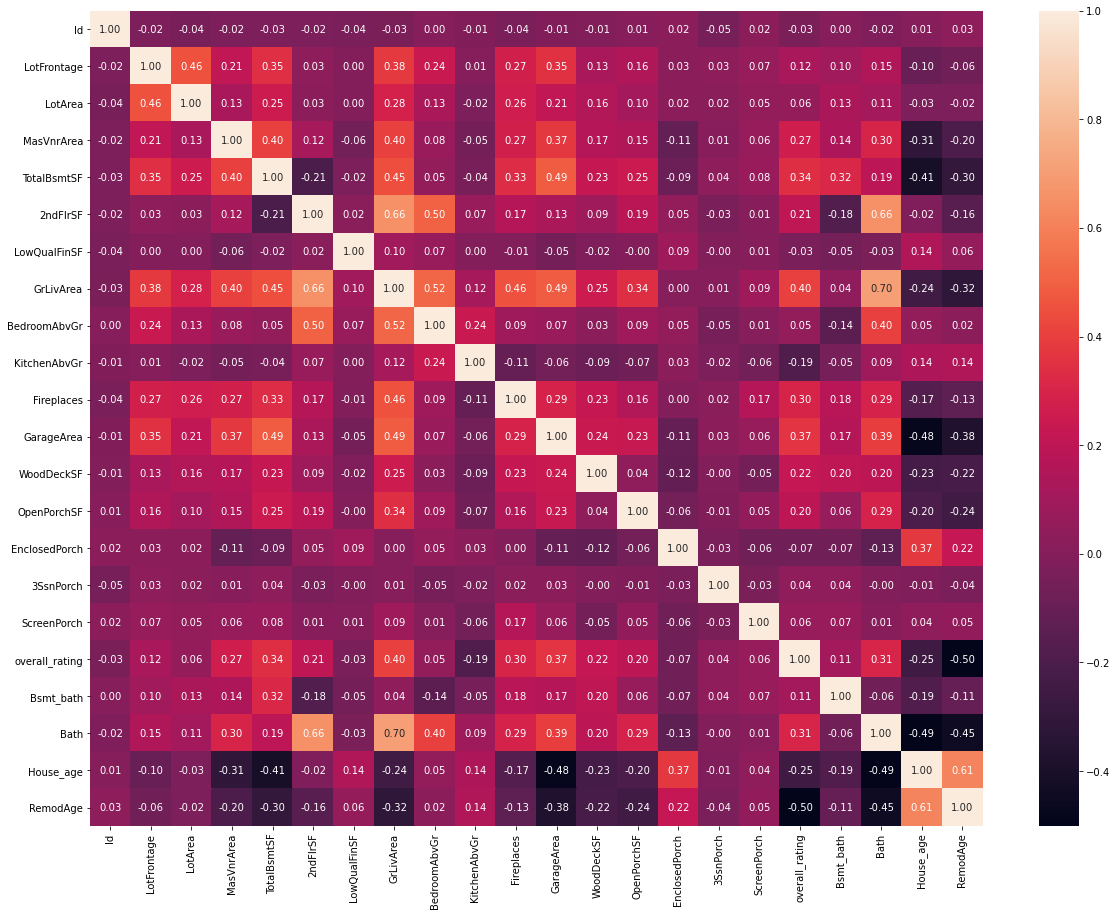

In [263]:
plt.figure(figsize = (20,15))
sns.heatmap((df2).corr(),annot=True,fmt='.2f') 
plt.show()

In [264]:
num_cols_new = [f for f in df2.columns if df2.dtypes[f] != 'object']
cat_cols_new = [f for f in df2.columns if df2.dtypes[f] == 'object']

In [267]:
import scipy
scipy.stats.skew(df2[num_cols_new])

array([ 0.        ,  1.3489267 , 12.8224314 ,  2.60350504,  1.1628121 ,
        0.86167475, 12.088761  ,  1.26935769,  0.32632435,  4.30225437,
        0.7334946 ,  0.24104735,  1.84243281,  2.53511373,  4.00389122,
       11.37606468,  3.9466937 , -0.56412339,  0.51141593,  0.4259051 ,
        0.5986094 ,  0.45022621])

In [270]:
df_skew = pd.DataFrame(num_cols_new, columns=['features_n'])

In [272]:
df_skew['Skewness'] = df_skew['features_n'].apply(lambda a: scipy.stats.skew(df2[a]))
df_skew['skewed'] = df_skew['Skewness'].apply(lambda x: True if abs(x)>=0.5 else False)

In [274]:
df_skew[df_skew['Skewness']>0.5]

,features_n,Skewness,skewed
1,LotFrontage,1.348927,True
2,LotArea,12.822431,True
3,MasVnrArea,2.603505,True
4,TotalBsmtSF,1.162812,True
5,2ndFlrSF,0.861675,True
6,LowQualFinSF,12.088761,True
7,GrLivArea,1.269358,True
9,KitchenAbvGr,4.302254,True
10,Fireplaces,0.733495,True
12,WoodDeckSF,1.842433,True


In [275]:
skewd = []
for i in df_skew[df_skew['Skewness']>0.5]['features_n']:
    df_skew['log_skewd'] = skewd.append(i)
    

In [276]:
df3 = df2.copy()

In [277]:
for i in skewd:
    df3[i] = np.log1p(df3[i])

C:\Users\achyuth.v\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [278]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              2919 non-null   int64  
 1   MSSubClass      2919 non-null   object 
 2   MSZoning        2919 non-null   object 
 3   LotFrontage     2919 non-null   float64
 4   LotArea         2919 non-null   float64
 5   Street          2919 non-null   object 
 6   LotShape        2919 non-null   object 
 7   LandContour     2919 non-null   object 
 8   Utilities       2919 non-null   object 
 9   LotConfig       2919 non-null   object 
 10  LandSlope       2919 non-null   object 
 11  Neighborhood    2919 non-null   object 
 12  Condition1      2919 non-null   object 
 13  Condition2      2919 non-null   object 
 14  BldgType        2919 non-null   object 
 15  HouseStyle      2919 non-null   object 
 16  RoofStyle       2919 non-null   object 
 17  RoofMatl        2919 non-null   o

In [279]:
target_log = np.log(target)

In [319]:
plt.House_age

0       1.791759
1       3.465736
2       2.079442
3       4.521789
4       2.197225
          ...   
1454    3.610918
1455    3.610918
1456    3.850148
1457    2.708050
1458    2.639057
Name: House_age, Length: 2919, dtype: float64

In [316]:
df3['House_age'].isna().sum()

0

In [320]:
def plot_hist_box(data):
    figure, axis = plt.subplots(1,2,figsize=(15, 5))
    plt.suptitle(data.name)
    axis[0].boxplot(data)
    axis[1] = sns.distplot(data)
    axis[1].lines[0].set_color('crimson')
    rect = plt.Rectangle(
    (0, 0), 1, 1, fill=False, color="k", lw=3, transform=figure.transFigure, figure=figure)
    figure.patches.extend([rect])
    plt.show()

C:\Users\achyuth.v\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


OverflowError: cannot convert float infinity to integer

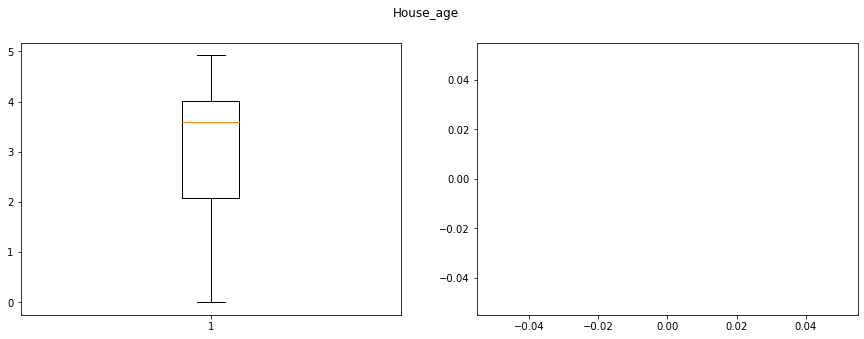

In [377]:
plot_hist_box(df3.House_age)

In [329]:
df3.sort_values(by = 'House_age')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,MoSold,SaleType,SaleCondition,overall_rating,Bsmt_bath,Bath,House_age,RemodAge
1089,2550,20,RL,4.859812,10.578751,Pave,IR1,Bnk,AllPub,Inside,...,0.0,0.0,10,New,Partial,7.5,1.098612,3,-inf,-2
861,2322,20,RL,3.988984,8.219057,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,8,New,Partial,6.0,0.000000,2,0.000000,0
1403,1404,20,RL,3.912023,9.632794,Pave,IR1,Lvl,AllPub,CulDSac,...,0.0,0.0,8,WD,Normal,6.5,0.693147,2,0.000000,0
770,2231,60,RL,4.406719,9.394244,Pave,IR1,HLS,AllPub,Corner,...,0.0,0.0,10,New,Partial,6.0,0.000000,3,0.000000,0
1402,1403,20,RL,4.174387,8.819222,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,7,New,Partial,6.0,0.000000,2,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,305,75,RM,4.477337,9.819399,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,5,WD,Normal,8.0,0.000000,3,4.859812,6
747,748,70,RM,4.189655,9.367430,Pave,IR1,Lvl,AllPub,Corner,...,0.0,0.0,5,WD,Normal,7.0,0.000000,2,4.867534,6
396,1857,70,RL,4.795791,10.181157,Pave,Reg,Bnk,AllPub,FR2,...,0.0,0.0,6,WD,Normal,6.0,0.000000,1,4.867534,2
1137,1138,50,RL,4.007333,8.755107,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,5,WD,Normal,6.5,0.000000,1,4.912655,14


In [410]:
df3.loc[df3['House_age'] <0,'House_age'] = 0

In [412]:
df3.loc[df3['RemodAge'] == -2,'RemodAge'] = 0

In [413]:
df4=df3.copy()

In [414]:
from scipy.stats import skew
df4[num_cols_new].skew()

Id                0.000000
LotFrontage      -0.939621
LotArea          -0.505010
MasVnrArea        0.510089
TotalBsmtSF      -4.984154
2ndFlrSF          0.305206
LowQualFinSF      8.562091
GrLivArea         0.013194
BedroomAbvGr      0.326492
KitchenAbvGr      3.522161
Fireplaces        0.237710
GarageArea        0.241171
WoodDeckSF        0.158114
OpenPorchSF      -0.041819
EnclosedPorch     1.962089
3SsnPorch         8.829794
ScreenPorch       2.947420
overall_rating   -0.564413
Bsmt_bath         0.242608
Bath              0.426124
House_age        -0.816647
RemodAge          0.450547
dtype: float64

In [415]:
cat_cols_new

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MoSold',
 'SaleType',
 'SaleCondition']

In [416]:
df4_dummy = pd.get_dummies(df4, columns = ['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MoSold',
 'SaleType',
 'SaleCondition'], drop_first = True)

C:\Users\achyuth.v\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [417]:
col_dummys = df4_dummy.columns.tolist()

In [418]:
df4_dummy.shape

(2919, 259)

In [419]:
x_train = df4_dummy.loc[:1459,:]
y_train = target_log
x_test = df4_dummy.loc[1459:, :]

In [420]:
x_train.shape, y_train.shape, x_test.shape

((1460, 259), (1460,), (1460, 259))

In [421]:
x_test.reset_index(inplace = True, drop = True)

In [422]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_train,y_train, test_size = 0.1, random_state = 11)

In [423]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [424]:
scaler = StandardScaler()

In [425]:
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [426]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [427]:
Base_Models = [LinearRegression(),
               KNeighborsRegressor(),
               SVR(),
               DecisionTreeRegressor(),
               RandomForestRegressor(),
               AdaBoostRegressor(), 
               GradientBoostingRegressor()]

score = []
mae = []
rmse = []

for model in Base_Models:
    models = model
    
    models.fit(xtrain,ytrain)
    y_pred = models.predict(xtest)
    
    score.append(r2_score(ytest,y_pred) * 100)
    mae.append(mean_absolute_error(ytest,y_pred))
    rmse.append(np.sqrt(mean_squared_error(ytest,y_pred)))

In [428]:
result = {"Models":["LinearRegression","KNeighborsRegressor","SVR","DecisionTreeRegressor","RandomForestRegressor","AdaBoostRegressor","GradientBoostingRegressor"],
         "r2_score":score,
         "MAE":mae,
         "RMSE": rmse}
result = pd.DataFrame(result)
result = result.set_index("Models")

In [429]:
result

,r2_score,MAE,RMSE
Models,,,
LinearRegression,-1.956556e+09,146.185905,1765.234023
KNeighborsRegressor,7.133175e+01,0.158142,0.213676
SVR,7.058602e+01,0.140014,0.216438
DecisionTreeRegressor,6.717042e+01,0.151271,0.228659
RandomForestRegressor,8.726373e+01,0.093569,0.142422
AdaBoostRegressor,8.152476e+01,0.122411,0.171534
GradientBoostingRegressor,8.825220e+01,0.089504,0.136784


In [430]:
from sklearn.model_selection import GridSearchCV

In [431]:
gb_model = GradientBoostingRegressor(learning_rate= 0.1,
 loss= 'huber',
 max_depth= 3,
 max_features= 'auto',
 max_leaf_nodes= 6,
 n_estimators= 150,
 random_state= 200)

In [432]:
param_grid = {"n_estimators": [200, 250, 300],
             "max_depth": [3, 7, 9],
             "loss": ['huber'],
             "learning_rate": [0.1],
             "random_state": [200],
             "max_features": ["auto"],
             "max_leaf_nodes": [6]
             }

In [433]:
grid_model = GridSearchCV(gb_model,param_grid=param_grid)

In [434]:
grid_model.fit(xtrain,ytrain)

GridSearchCV(estimator=GradientBoostingRegressor(loss='huber',
                                                 max_features='auto',
                                                 max_leaf_nodes=6,
                                                 n_estimators=150,
                                                 random_state=200),
             param_grid={'learning_rate': [0.1], 'loss': ['huber'],
                         'max_depth': [3, 7, 9], 'max_features': ['auto'],
                         'max_leaf_nodes': [6], 'n_estimators': [200, 250, 300],
                         'random_state': [200]})

In [435]:
grid_model.best_params_

{'learning_rate': 0.1,
 'loss': 'huber',
 'max_depth': 7,
 'max_features': 'auto',
 'max_leaf_nodes': 6,
 'n_estimators': 200,
 'random_state': 200}

In [436]:
grid_model.best_score_

0.8839925227017602

In [437]:
grid_model.score(xtrain,ytrain)

0.9608655249724305

In [438]:
f_pred =  grid_model.predict(x_test)

In [439]:
out1 = np.exp(f_pred)

In [440]:
out1

array([138737.86184889, 185436.61416262, 144626.00939985, ...,
       203236.30922685, 183341.82653181, 197758.07341812])

In [441]:
imp1 = pd.DataFrame()

In [442]:
x_test.shape, out1.shape

((1460, 259), (1460,))

In [443]:
imp1['Id'] = x_test['Id']
imp1['SalePrice'] = out1

In [446]:
imp1 = imp1.iloc[1:,:]

In [447]:
imp1

,Id,SalePrice
1,1461,185436.614163
2,1462,144626.009400
3,1463,190386.890901
4,1464,197690.996836
5,1465,152404.976130
...,...,...
1455,2915,283094.968733
1456,2916,175935.954485
1457,2917,203236.309227
1458,2918,183341.826532


In [448]:
imp1.to_csv('sub3.csv', index = False)